# Purpose
Here, we intend to verify that the 1-spingroup Encore algorithms converges to the 2-spingroup Encore algorithms when the one spingroup is very infrequent (i.e. low level-density).

# Importing Modules

In [1]:
import sys
sys.path.append('../')

import TAZ

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, edgeitems=9, linewidth=130)

In [2]:
%matplotlib widget

# WigBayes Test

#### Gathering Mean Parameters

In [3]:
eps = 0.005 # ...

A  = 181
EB = (1e-5,5000)
pM    = [0.12547, 0.14404]
FreqF = 1.0/6.0
Freq  = [(1-eps)/4.3166, eps/4.3166]
Gnm   = [44.11355, 33.38697]
Ggm   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

# 2 Spingroup Case:
SGs = TAZ.SpinGroups.make(l, j)
MP2 = TAZ.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB, FreqF=FreqF)

# 1 Spingroup Case:
SGs = TAZ.SpinGroups.make(l[:1], j[:1])
MP1 = TAZ.MeanParameters(Freq=Freq[:1], Gnm=Gnm[:1], nDOF=dfn[:1], Ggm=Ggm[:1], gDOF=dfg[:1], A=A, sg=SGs, EB=EB, FreqF=FreqF)

#### Sampler

In [4]:
Res, Types, Missed_Res, Missed_Types = MP2.sample()

#### Running 1-Spingroup WigBayes

In [5]:
Prior, TPPrior = TAZ.PTBayes(Res, MP1)
distributions = MP1.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, MP1.EB, distributions, MP1.FreqF, Prior, TPPrior)
Posterior_1 = runMaster.WigBayes(verbose=True)

Preparing level-spacings
Finished level-spacing calculations

    In calculating the total probability ("TP"), there was a percent error of 1.110%.
    This exceeds the set limit of 1.000%. This error could be attributed to a bug or
    numerical instability.
    
Finished CP calculation
Finished WigBayes calculation


#### Running 2-Spingroup WigBayes

In [6]:
Prior, TPPrior = TAZ.PTBayes(Res, MP2)
distributions = MP2.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, MP1.EB, distributions, MP1.FreqF, Prior, TPPrior)
Posterior_2 = runMaster.WigBayes(verbose=True)

Preparing level-spacings
Finished level-spacing calculations

    In calculating the total probability ("TP"), there was a percent error of 1.129%.
    This exceeds the set limit of 1.000%. This error could be attributed to a bug or
    numerical instability.
    
Finished CP calculation
Finished WigBayes calculation


### Comparison

Average Error for True Probability  = 0.00162
Average Error for False Probability = 0.00189



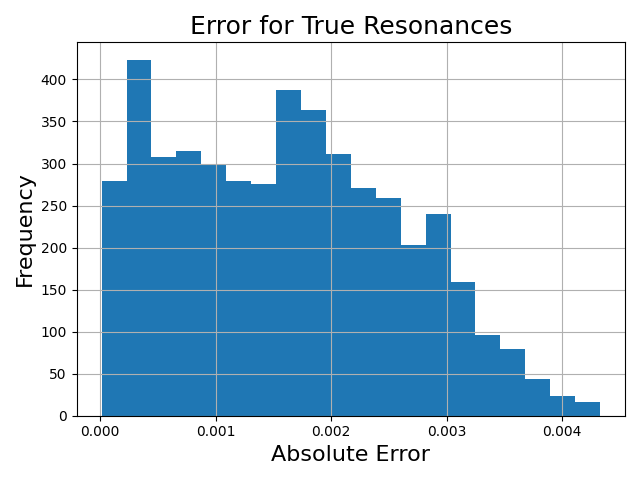

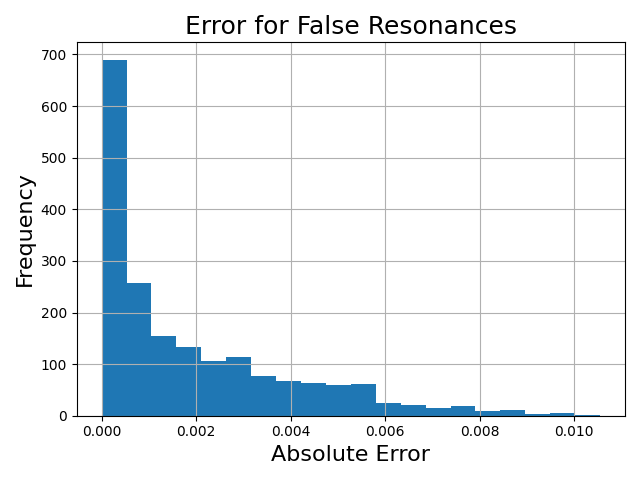

In [7]:
abs_err_true  = abs(Posterior_2[:,0] - Posterior_1[:,0])
abs_err_false = abs(Posterior_2[:,2] - Posterior_1[:,1])

average_err_true  = np.mean(abs_err_true)
average_err_false = np.mean(abs_err_false)

print(f'Average Error for True Probability  = {average_err_true:.5f}')
print(f'Average Error for False Probability = {average_err_false:.5f}')
print()

plt.figure(1)
plt.clf()
plt.hist(abs_err_true, bins=20, density=True)
plt.grid()
plt.title('Error for True Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(2)
plt.clf()
plt.hist(abs_err_false, bins=20, density=True)
plt.grid()
plt.title('Error for False Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tight_layout()
plt.show()

### Comparing Posteriors:

In [8]:
print('True Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,:1], Posterior_2[:,:1]), axis=1))
print()
print('False Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,1:], Posterior_2[:,2:]), axis=1))

True Spingroup Posterior:
[[0.571043 0.569249]
 [0.549773 0.548125]
 [0.841088 0.839836]
 [1.002647 1.002721]
 [0.971236 0.97103 ]
 [0.723804 0.72183 ]
 [0.677189 0.676966]
 [0.551418 0.548952]
 [0.559708 0.559143]
 ...
 [0.809487 0.807829]
 [0.901724 0.900947]
 [0.703128 0.700804]
 [0.605904 0.605669]
 [0.721048 0.719627]
 [0.951487 0.950949]
 [0.98058  0.98033 ]
 [0.93547  0.93488 ]
 [0.745608 0.743254]]

False Spingroup Posterior:
[[ 0.428957  0.425891]
 [ 0.450227  0.446513]
 [ 0.158912  0.158243]
 [-0.002647 -0.002749]
 [ 0.028764  0.028575]
 [ 0.276196  0.275014]
 [ 0.322811  0.320554]
 [ 0.448582  0.445471]
 [ 0.440292  0.437363]
 ...
 [ 0.190513  0.189863]
 [ 0.098276  0.097964]
 [ 0.296872  0.295421]
 [ 0.394096  0.391294]
 [ 0.278952  0.277876]
 [ 0.048513  0.048518]
 [ 0.01942   0.019504]
 [ 0.06453   0.064485]
 [ 0.254392  0.253743]]
